**Bigdata Analytics  |  CSC 3303  |  Sec: 1  |  Group Project**

**Authors:**


1.   Tasnim Rafia 1725826 
2.   Billah Syed Mashkur 1723387
3.   Hasan Tanveer Mahmood 1725413
4.   K.M Zubair 1722931



**Project Title:** E-commerce data analysis and visualization (Pakistan's Largest ECommerce)

**Abastract**

   This project is primarily trying to analyze one E-commerce dataset (Pakistan's Largest ECommerce
Dataset), where the product values will be analyzed along with the popularity by
comparing the sales history among themselves. According to the analysis, some suggestions to
undertake are going to be provided in order to increase the popularity of the company by
forecasting the sales condition of next year with the help of time series analysis in terms of the
dataset history such as product status, the most sold product history etc. that is already accorded
in the dataset. Many research has been already conducted using public datasets, still many business
questions yet to be answered from Realtime dataset. The purpose of this research is to understand
the ecommerce domain better by analyzing the public datasets. An overall depth analysis will be
performed by comparing the product status history so far. The main aim of the project is to
implement a solution to assist the company to enhance their popularity. Therefore, this research
will propose a strategy on how they can improve their sales.



**Research Questions:**

1.   Which category has the most popularity in terms of sale? (Descriptive)
2.   How was the sales condition throughout the time from July, 2016 to July, 2018 ? (Diagnostic)
3.   Do the most cancelled category of items get affected by time or customer ? (Causality Analysis)
4.   How is the sales state going to be next year ? (Predictive)
5.   Which product demand is in a high-rising phase? (Exploratory)
6.   Which are the categories those get cancelled the most? (Exploratory)


**Necessary Library and Packages**

In [1]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the DataSets.**

In [3]:
path = '/content/drive/MyDrive/Final Project/Pakistan Largest Ecommerce Dataset.csv'
EC_pakistan = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
EC_pakistan.head(5)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning And Preprocessing.**

In [5]:
#Describe data sets
EC_pakistan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
item_id,584524.0,565667.074218,200121.173648,211131.0,395000.75,568424.5,739106.25,905208.0
price,584524.0,6348.747531,14949.269515,0.0,360.00,899.0,4070.00,1012625.9
qty_ordered,584524.0,1.296388,3.996061,1.0,1.00,1.0,1.00,1000.0
grand_total,584524.0,8530.618571,61320.814625,-1594.0,945.00,1960.4,6999.00,17888000.0
discount_amount,584524.0,499.492775,1506.943046,-599.5,0.00,0.0,160.50,90300.0
Year,584524.0,2017.044115,0.707355,2016.0,2017.00,2017.0,2018.00,2018.0
Month,584524.0,7.167654,3.486305,1.0,4.00,7.0,11.00,12.0
Customer ID,584513.0,45790.511965,34414.962389,1.0,13516.00,42856.0,73536.00,115326.0
Unnamed: 21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Check the null Values
EC_pakistan.isnull().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

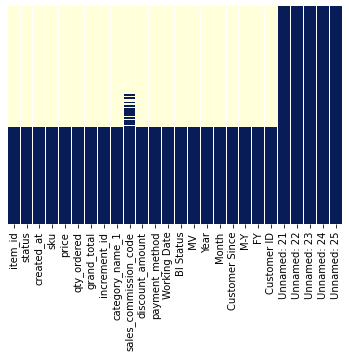

In [7]:
#Visualize the Null Values
sns.heatmap(EC_pakistan.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [8]:
# Drop Unnecesarry Column.
EC_pakistan.drop(['sales_commission_code','Unnamed: 21', 'Unnamed: 22','Unnamed: 23', 'Unnamed: 24','Unnamed: 25'], axis='columns', inplace=True)

In [9]:
EC_pakistan.head(5)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [10]:
# Check which Row has null values.
null_columns=EC_pakistan.columns[EC_pakistan.isnull().any()]
print(EC_pakistan[EC_pakistan["item_id"].isnull()][null_columns])

         item_id status created_at  sku  ...  Customer Since  M-Y   FY Customer ID
584524       NaN    NaN        NaN  NaN  ...             NaN  NaN  NaN         NaN
584525       NaN    NaN        NaN  NaN  ...             NaN  NaN  NaN         NaN
584526       NaN    NaN        NaN  NaN  ...             NaN  NaN  NaN         NaN
584527       NaN    NaN        NaN  NaN  ...             NaN  NaN  NaN         NaN
584528       NaN    NaN        NaN  NaN  ...             NaN  NaN  NaN         NaN
...          ...    ...        ...  ...  ...             ...  ...  ...         ...
1048570      NaN    NaN        NaN  NaN  ...             NaN  NaN  NaN         NaN
1048571      NaN    NaN        NaN  NaN  ...             NaN  NaN  NaN         NaN
1048572      NaN    NaN        NaN  NaN  ...             NaN  NaN  NaN         NaN
1048573      NaN    NaN        NaN  NaN  ...             NaN  NaN  NaN         NaN
1048574      NaN    NaN        NaN  NaN  ...             NaN  NaN  NaN         NaN

[46

In [11]:
# Remove All null values.
EC_pakistan = EC_pakistan[EC_pakistan['item_id'].notna()]


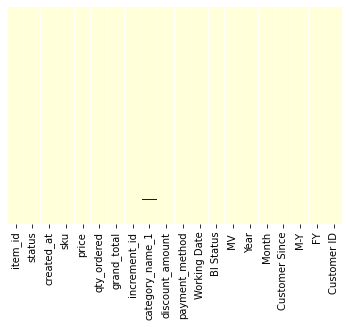

In [12]:
#Visualize the Null Values
sns.heatmap(EC_pakistan.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [13]:
null_columns=EC_pakistan.columns[EC_pakistan.isnull().any()]
print(EC_pakistan[EC_pakistan["category_name_1"].isnull()][null_columns])

                status                    sku  ... Customer Since Customer ID
425895  order_refunded  MEFQMO59B0942707B79-L  ...         2017-8     59587.0
431194        received  MEFQMO59B0942707B79-M  ...         2017-8     59587.0
432492        canceled  MEFQMO59B0942707B79-M  ...         2017-3     37311.0
432494        canceled  MEFQMO59B0942707B79-M  ...         2017-3     37311.0
432496  order_refunded  MEFQMO59B0942707B79-M  ...         2018-1     85633.0
...                ...                    ...  ...            ...         ...
535572        received    KABASA5ABC763F62E76  ...         2018-5    108622.0
541927        received    WOFASA5AE962A6DD038  ...         2016-7      2237.0
549314        canceled  MEFQMO59B0942707B79-M  ...         2018-1     85385.0
568069        canceled     COMWD5AA8FF5851E73  ...         2018-7    113144.0
580564        received     COMWD5AA8FF5851E73  ...        2017-11     79853.0

[164 rows x 5 columns]


In [14]:
# Summarize the remaining Null values column.
EC_pakistan.isnull().sum()

item_id              0
status              15
created_at           0
sku                 20
price                0
qty_ordered          0
grand_total          0
increment_id         0
category_name_1    164
discount_amount      0
payment_method       0
Working Date         0
BI Status            0
 MV                  0
Year                 0
Month                0
Customer Since      11
M-Y                  0
FY                   0
Customer ID         11
dtype: int64

In [15]:
# Rename the Columns Name.
EC_pakistan.columns = ['Item ID', 'Status', 'Created at', 'Product Name', 'Price', 'Quantity', 'Grand Total', 'Increment ID', 'Product Category', 'Discount Amount', 'Payment Method', 'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since', 'M-Y', 'FY', 'Customer ID']

In [16]:
EC_pakistan.tail(5)

,Item ID,Status,Created at,Product Name,Price,Quantity,Grand Total,Increment ID,Product Category,Discount Amount,Payment Method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,0.0,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,0.0,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,0.0,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,0.0,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,8/28/2018,MATSAM5B10F91A9B6AB,108640.0,2.0,652178.0,100562387,Mobiles & Tablets,0.0,bankalfalah,8/28/2018,Gross,"217,280",2018.0,8.0,2018-7,8-2018,FY19,113474.0


# **Data Visualization & Result Findings.**

**Showing the correlation Among the columns.**

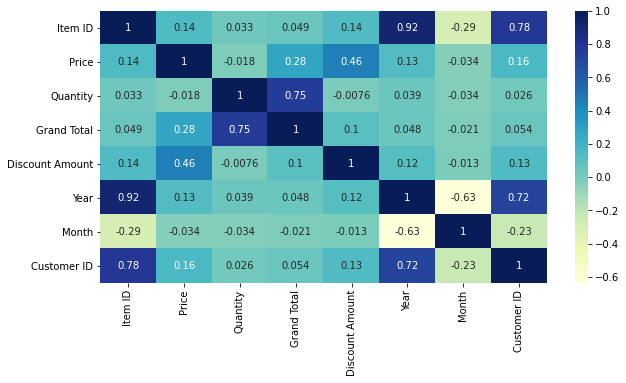

In [17]:
corr = EC_pakistan.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap="YlGnBu")

# **Data Analysis With Spark.**

In [18]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
import findspark
findspark.init()
findspark.find()

'/content/spark-3.1.1-bin-hadoop3.2'

In [19]:
pip install Prophet

In [20]:
import findspark 
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
findspark.init()

from pyspark.sql import SparkSession
import pyspark.sql.functions as sf, pyspark.sql.types as st

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from prophet import Prophet
from sklearn.metrics import accuracy_score

In [21]:
!pip install squarify
import squarify

In [22]:
spark = SparkSession.builder\
         .master("local")\
         .appName("test 2")\
         .config('spark.ui.port', '4050')\
         .getOrCreate()

In [23]:
df_ecData = spark.read.csv("/content/drive/MyDrive/Final Project/Pakistan Largest Ecommerce Dataset.csv", header=True, inferSchema=True)

In [24]:
df_ecData.count()

1048586

In [25]:
# Drop Null values and Unnecessary column
df_ecData = df_ecData.dropna(how='all')\
.drop('_c21','_c22', '_c23', '_c24', '_c25')

In [26]:
#drop duplicates 
df_ecData = df_ecData.dropna(how='all')
df_ecData = df_ecData.withColumn('created_at',sf.to_timestamp(sf.col("created_at"), 'M/d/yyyy'))\
                    .withColumn('customer_id',sf.col("Customer ID"))\
                    .drop_duplicates()

In [27]:

df_ecData.show()

+-------+--------------+-------------------+--------------------+------+-----------+-----------+------------+-----------------+---------------------+---------------+--------------+------------+---------+-------+----+-----+--------------+------+----+-----------+-----------+
|item_id|        status|         created_at|                 sku| price|qty_ordered|grand_total|increment_id|  category_name_1|sales_commission_code|discount_amount|payment_method|Working Date|BI Status|    MV |Year|Month|Customer Since|   M-Y|  FY|Customer ID|customer_id|
+-------+--------------+-------------------+--------------------+------+-----------+-----------+------------+-----------------+---------------------+---------------+--------------+------------+---------+-------+----+-----+--------------+------+----+-----------+-----------+
| 211197|order_refunded|2016-07-01 00:00:00|      kcc_krone deal| 360.0|          1|        360|   100147482|Beauty & Grooming|         C-Rwp-101853|              0|           co

In [28]:
df_ecData.printSchema()

root
 |-- item_id: string (nullable = true)
 |-- status: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- sku: string (nullable = true)
 |-- price: double (nullable = true)
 |-- qty_ordered: string (nullable = true)
 |-- grand_total: string (nullable = true)
 |-- increment_id: string (nullable = true)
 |-- category_name_1: string (nullable = true)
 |-- sales_commission_code: string (nullable = true)
 |-- discount_amount: string (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- Working Date: string (nullable = true)
 |-- BI Status: string (nullable = true)
 |--  MV : string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Customer Since: string (nullable = true)
 |-- M-Y: string (nullable = true)
 |-- FY: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- customer_id: string (nullable = true)



In [29]:
df_ecData.describe().show()

+-------+-------------------+------------------+------------------+-----------------+------------------+-----------------+--------------------+---------------+---------------------+------------------+--------------+-------------------+-----------------+------------------+------------------+-----------------+------------------+------+------+------------------+------------------+
|summary|            item_id|            status|               sku|            price|       qty_ordered|      grand_total|        increment_id|category_name_1|sales_commission_code|   discount_amount|payment_method|       Working Date|        BI Status|               MV |              Year|            Month|    Customer Since|   M-Y|    FY|       Customer ID|       customer_id|
+-------+-------------------+------------------+------------------+-----------------+------------------+-----------------+--------------------+---------------+---------------------+------------------+--------------+-------------------+---

In [30]:
df_pandas = df_ecData.toPandas()
df_pandas.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'customer_id'],
      dtype='object')

In [31]:
df_pandas['item_id'] = df_pandas['item_id'].astype('string')
df_pandas['status'] = df_pandas['status'].astype('category')
df_pandas['sku'] = df_pandas['sku'].astype('string')
df_pandas['qty_ordered'] = df_pandas['qty_ordered'].astype('string')
df_pandas['grand_total'] = df_pandas['grand_total'].astype('string')
df_pandas['increment_id'] = df_pandas['increment_id'].astype('string')
df_pandas['category_name_1'] = df_pandas['category_name_1'].astype('category')
df_pandas['sales_commission_code'] = df_pandas['sales_commission_code'].astype('string')
df_pandas['discount_amount'] = df_pandas['discount_amount'].astype('string')
df_pandas['payment_method'] = df_pandas['payment_method'].astype('category')
df_pandas['Working Date'] = df_pandas['Working Date'].astype('datetime64')
df_pandas['BI Status'] = df_pandas['BI Status'].astype('category')
df_pandas[' MV '] = df_pandas[' MV '].astype('string')
df_pandas['Year'] = df_pandas['Year'].astype('string')
df_pandas['Month'] = df_pandas['Month'].astype('string')
df_pandas['Customer Since'] = df_pandas['Customer Since'].astype('string')
df_pandas['M-Y'] = df_pandas['M-Y'].astype('string')
df_pandas['FY'] = df_pandas['FY'].astype('string')
df_pandas['customer_id'] = df_pandas['customer_id'].astype('string')

# **Analysis of Research Questions**

***1. Which category has the most popularity in terms of sale? (Descriptive)*** 

In [32]:
df_ctgr = df_ecData.groupby(sf.col('category_name_1')).agg(sf.count('item_id').alias('no_of_item'))

In [33]:
df_ctgr.show()

+------------------+----------+
|   category_name_1|no_of_item|
+------------------+----------+
|               cod|         7|
|School & Education|      3477|
|     Entertainment|     26326|
|       Kids & Baby|     16485|
|         Computing|     15933|
|                \N|      7850|
|              null|       175|
| Mobiles & Tablets|    115710|
| Beauty & Grooming|     41496|
|   Health & Sports|     17502|
|           Soghaat|     34011|
|             Books|      1870|
|            Others|     29218|
|           Payaxis|         4|
|        Superstore|     43613|
|     Men's Fashion|     92220|
|        Appliances|     52413|
|   Women's Fashion|     59721|
|     Home & Living|     26504|
+------------------+----------+



In [34]:
df_ecData.createOrReplaceTempView("eCommerce_view")

In [35]:
df_visual = spark.sql("SELECT category_name_1, count(item_id) as no_of_item FROM eCommerce_view group by category_name_1 order by no_of_item desc")
fig = px.bar(df_visual.toPandas(), x='category_name_1', y='no_of_item', color= 'no_of_item', color_continuous_scale= 'rainbow')
fig.show()

***2. How was the sales condition throughout the time from July, 2016 to July, 2018 ? (Diagnostic)***

In [36]:
df_visual = spark.sql("SELECT created_at, sum(grand_total) as total FROM eCommerce_view group by created_at order by created_at")

df_visual = df_visual.toPandas()

fig = go.Figure([go.Scatter(x=df_visual['created_at'], y=df_visual['total'])])
fig.update_xaxes(rangeslider_visible=True)

fig.show()

***3. Do the most cancelled category of items get affected by time or customer ? (Causality Analysis)***

In [37]:
df_cancell = df_ecData.where(sf.col('status')=='canceled').groupby(sf.col('category_name_1'),sf.col('status')).agg(sf.count('status').alias('Cancelled_items'))
df_cancell = df_cancell.toPandas()
df_cancell.sort_values(by='Cancelled_items',ascending=False,inplace=True)
df_cancell

,category_name_1,status,Cancelled_items
16,Mobiles & Tablets,canceled,53715
15,Men's Fashion,canceled,22024
13,Appliances,canceled,21628
12,Others,canceled,18369
4,Women's Fashion,canceled,15961
2,Superstore,canceled,13926
0,Entertainment,canceled,12579
8,Beauty & Grooming,canceled,9686
10,Soghaat,canceled,7593
7,Home & Living,canceled,7199


In [38]:
graph = px.bar(df_cancell,x='category_name_1',y='Cancelled_items')
graph.show()

In [39]:
df_visual = spark.sql("SELECT created_at, count(item_id) as total FROM eCommerce_view where status = 'canceled' and category_name_1 = 'Mobiles & Tablets' group by created_at order by created_at desc")

df_visual = df_visual.toPandas()

fig = go.Figure([go.Scatter(x=df_visual['created_at'], y=df_visual['total'])])
fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [40]:
df_visual = spark.sql("SELECT created_at, count(item_id) as total FROM eCommerce_view where status <> 'canceled' and category_name_1 = 'Mobiles & Tablets' group by created_at order by created_at desc")

df_visual = df_visual.toPandas()

fig = go.Figure([go.Scatter(x=df_visual['created_at'], y=df_visual['total'])])
fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [41]:
df_ccl = spark.sql("SELECT customer_id, count(item_id) as total_cancelled FROM eCommerce_view where status = 'canceled' and category_name_1 = 'Mobiles & Tablets' group by customer_id order by total_cancelled desc")

df_ccl = df_ccl.toPandas()

df_ccl.head(5)

,customer_id,total_cancelled
0,39707,496
1,26527,355
2,28896,312
3,10654,309
4,12278,290


In [42]:
df_Notccl = spark.sql("SELECT customer_id, count(item_id) as total_Not_cancelled FROM eCommerce_view where status <> 'canceled' and category_name_1 = 'Mobiles & Tablets' group by customer_id order by total_Not_Cancelled desc")

df_Notccl = df_Notccl.toPandas()
df_Notccl.head(5)

,customer_id,total_Not_cancelled
0,5769,185
1,163,172
2,36,158
3,800,157
4,820,155


In [43]:
df_final = df_ccl.merge(df_Notccl, on='customer_id',how='inner')
df_final = df_final.sort_values(by='total_cancelled', ascending=False)

print(f'Total Number of Customer : {df_final.shape[0]}')

df_final

Total Number of Customer : 8021


,customer_id,total_cancelled,total_Not_cancelled
0,39707,496,18
1,26527,355,77
2,28896,312,55
3,10654,309,35
4,12278,290,21
...,...,...,...
5743,66948,1,2
5744,84444,1,8
5745,54817,1,1
5746,29540,1,1


In [44]:
avg_cancel = df_final['total_cancelled'].mean()

df_avg = df_final.query(f'total_cancelled > {avg_cancel}')

print(f'Total Number of Customer who canceled more than average time : {df_avg.shape[0]}')

df_avg

Total Number of Customer who canceled more than average time : 1618


,customer_id,total_cancelled,total_Not_cancelled
0,39707,496,18
1,26527,355,77
2,28896,312,55
3,10654,309,35
4,12278,290,21
...,...,...,...
1390,4009,5,1
1391,74283,5,1
1404,74688,5,5
1393,16866,5,1


In [45]:
df_final.query(f'total_cancelled > 100')

,customer_id,total_cancelled,total_Not_cancelled
0,39707,496,18
1,26527,355,77
2,28896,312,55
3,10654,309,35
4,12278,290,21
5,87724,271,10
6,8963,222,67
7,12535,220,17
8,13793,207,26
9,59331,201,9


# Using RandomForestRegression Model
***4. How is the sales state going to be next year ? (Predictive)***



In [46]:
data_reg = spark.sql("SELECT Year, category_name_1, sum(grand_total) as total FROM eCommerce_view group by Year, category_name_1 Order by Year")

data_reg = data_reg.toPandas()

data_reg.dropna(inplace=True)

data_reg["category_name_1"] = data_reg["category_name_1"].astype('category')
data_reg["category_name_1"] = data_reg["category_name_1"].cat.codes
data_reg['total'] = data_reg['total'].astype('float')
data_reg['Year'] = data_reg['Year'].astype('int64')

x = data_reg[['Year','category_name_1']]
y = data_reg['total']


In [47]:
from sklearn.model_selection import train_test_split
# i have spilt data into 75 and 25%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.27, random_state = 0)

In [48]:
#Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 20)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)


In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)

print(f"r2_score: {r2}, mean_squared_error: {mse}, mean_absolute_error: {mae}")

r2_score: 0.4277885705891772, mean_squared_error: 4.700391261310883e+16, mean_absolute_error: 138643103.93385413


# Using fbProphet Model
***How is the sales state going to be next year ? (Predictive)***



In [50]:
data = spark.sql("SELECT created_at, sum(grand_total) as total FROM eCommerce_view group by created_at order by created_at")

data = data.toPandas()

data.dropna(inplace=True)

In [51]:
data

,created_at,total
1,2016-07-01,1301026.75
2,2016-07-02,1408450.48
3,2016-07-03,2215490.88
4,2016-07-04,1094080.25
5,2016-07-05,913053.50
...,...,...
785,2018-08-24,2078130.30
786,2018-08-25,3669771.90
787,2018-08-26,3707955.40
788,2018-08-27,2425669.03


In [52]:
data = data.rename(columns={'created_at': 'ds', 'total' : 'y'})
data

,ds,y
1,2016-07-01,1301026.75
2,2016-07-02,1408450.48
3,2016-07-03,2215490.88
4,2016-07-04,1094080.25
5,2016-07-05,913053.50
...,...,...
785,2018-08-24,2078130.30
786,2018-08-25,3669771.90
787,2018-08-26,3707955.40
788,2018-08-27,2425669.03


In [53]:
train = data.query('ds < "2018-08-01"')
test = data.query('ds >= "2018-08-01"')

test.shape[0]


28

In [54]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
future = m.make_future_dataframe(periods=28)
future.tail()

,ds
784,2018-08-24
785,2018-08-25
786,2018-08-26
787,2018-08-27
788,2018-08-28


In [56]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
784,2018-08-24,1.232702e+07,-1.301581e+06,2.384102e+07
785,2018-08-25,8.119561e+06,-4.832260e+06,2.201629e+07
786,2018-08-26,7.022223e+06,-7.049099e+06,1.958191e+07
787,2018-08-27,8.238803e+06,-5.016572e+06,2.133650e+07
788,2018-08-28,8.162762e+06,-4.979071e+06,2.077750e+07


In [57]:
#fig1 = m.plot(forecast)

In [58]:
metric_df = forecast.set_index('ds')[['yhat']].join(test.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

metric_df

,ds,yhat,y
761,2018-08-01,8.531901e+06,5.029047e+06
762,2018-08-02,9.981466e+06,6.408254e+06
763,2018-08-03,1.322964e+07,4.582243e+06
764,2018-08-04,8.879734e+06,7.628585e+06
765,2018-08-05,7.613055e+06,1.617281e+06
766,2018-08-06,8.641090e+06,6.959422e+06
767,2018-08-07,8.365771e+06,4.296090e+06
768,2018-08-08,8.172316e+06,5.492023e+06
769,2018-08-09,9.487511e+06,2.587185e+06
770,2018-08-10,1.262250e+07,4.156481e+06


In [59]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(metric_df.y, metric_df.yhat)
mse = mean_squared_error(metric_df.y, metric_df.yhat)
mae = mean_absolute_error(metric_df.y, metric_df.yhat)

print(f"r2_score: {r2}, mean_squared_error: {mse}, mean_absolute_error: {mae}")

r2_score: -0.6234392611467166, mean_squared_error: 32187147347009.316, mean_absolute_error: 4901326.587481598


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


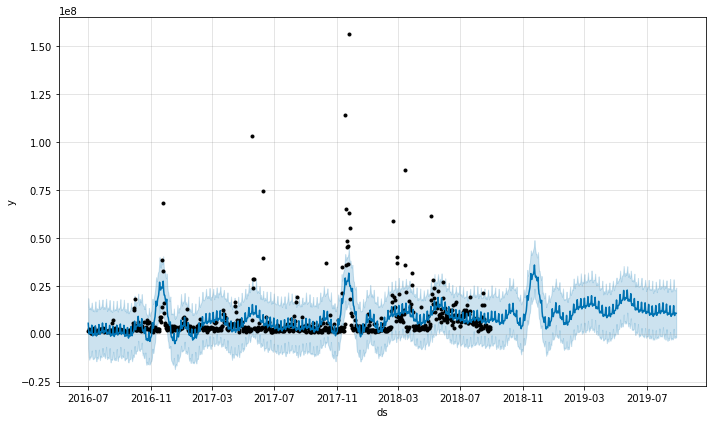

In [60]:
modFinal = Prophet()
modFinal.fit(data)
future = modFinal.make_future_dataframe(periods=365)
forecast = modFinal.predict(future)
fig1 = modFinal.plot(forecast)

In [61]:
# Creating A new DataFrame for visualize specipic Rows.
df = EC_pakistan[(EC_pakistan['Status'] == 'complete') | (EC_pakistan['Status'] == 'canceled') | (EC_pakistan['Status'] == 'order_refunded')]

In [62]:
df.head(5)

,Item ID,Status,Created at,Product Name,Price,Quantity,Grand Total,Increment ID,Product Category,Discount Amount,Payment Method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


**4. Which product demand is in a high-rising phase? (Exploratory)**

In [63]:
def displaygraph(df,groupbycol,groupbycriteria,title,xlabel,ylabel):
    lsfilterby=df[groupbycriteria].unique().tolist()
    df_dict = {}
    for n in lsfilterby:
        df1 = df[df[groupbycriteria]==n]
        df_dict[n] = df1.groupby(groupbycol)[groupbycriteria].count().reset_index()

    fig = go.Figure()

    for n in lsfilterby:
        fig.add_trace(go.Scatter(x=df_dict[n][groupbycol], y=df_dict[n][groupbycriteria],
                    mode='lines+markers',
                    name=n))    

    fig.update_layout(
    title_text=title, # title of plot
    xaxis_title_text=xlabel, # xaxis label
    yaxis_title_text=ylabel, # yaxis label
    
    )
    fig.show()

In [64]:
#Order Month year vs order status

displaygraph(EC_pakistan,'M-Y','Product Category','The Demand of Categories that are in High Rising Phase by Month','Month to Year','Count')

**5. Which are the categories those get cancelled the most? (Exploratory)**

In [65]:
Status=df.groupby(['Product Category','Status'])['Grand Total'].sum().reset_index()
graph=px.bar(Status,x='Product Category',y='Grand Total',color='Status')
graph.show()

**What are the categories that got cancelled the most?**

In [66]:
df_visual1 = spark.sql("SELECT category_name_1, count(status) as status FROM eCommerce_view where status= 'canceled' group by category_name_1  order by status desc ")
fig2 = px.bar(df_visual1.toPandas(), x='category_name_1', y='status',color = 'status', color_continuous_scale= 'rainbow' )
fig2.show()

# **REFERENCE**

1.   https://facebook.github.io/prophet/docs/quick_start.html
2.   https://pythondata.com/forecasting-time-series-data-prophet-part-4/





**End Of The Project**